# ECON457 Lab08

### Two parts:
- Optimization and root finding (scipy.optimize)
- Investment portfolio optimization: Modern portfolio theory (MPT), Sharpe ratio and efficient frontier

In [ ]:
## For installation on syzygy.ca, run the following two lines of code a first time to install the module, 
## and then close and shuntdown the notebook. Lastly, re-open the notebook to run the module.  
#import sys
#!{sys.executable} -m pip install --user pandas_datareader

#For installation on your own PC, directly run the following one line of code.
#!pip install pandas-datareader 

In [ ]:
# Note: yahoo finance has some changes to their API, as such, the pandas data reader module no longer works. instead use the module yfinance
# !pip install yfinance

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D # for 3-dimensional plotting
import matplotlib # for color map

import scipy.optimize as opt
plt.style.use('fivethirtyeight')
np.random.seed(777)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas_datareader.data as web

import datetime

## Part 1. Optimization and root finding (scipy.optimize)<a name = "optimization"/>
### 1.1 Background 

#### 1.1.1  Difference between optimization problems and root finding problems
These are two kinds of problems.
- Root-finding:  Solve f(x) = 0
- Optimization:  Maximize g(x) (or minimize g(x)) with or without constraints

When f(x) represents the derivative(s) of the optimization problem, two problems are equivalent. 

#### 1.1.2 Algorithms
Two types of problems use similar algorithm methods that are called in different ways. We use Newton's method as an example. 

$$\begin{split}\begin{array}{|c|c|c|c|}
\hline
\text{Finding roots of } f  & \text{Geometric Interpretation} & \text{Finding Extrema of } f & \text{Geometric Interpretation} \\
\hline
x_{n+1} = x_n -\frac{f(x_n)}{f'(x_n)} &\text{Invert linear approximation to }f & x_{n+1} = x_n -\frac{f'(x_n)}{f''(x_n)}& \text{Use quadratic approximation of } f \\
\hline
\end{array}\end{split}$$

As noted above, these are two ways of looking at exactly the same problem. For instance, the linear approximation in the root finding problem is simply the derivative function of the quadratic approximation in the optimization problem.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/NewtonIteration_Ani.gif/600px-NewtonIteration_Ani.gif)

References: 
- https://www4.stat.ncsu.edu/~rmartin/OldCourses/Stat451/Notes/451notes02.pdf
- https://en.wikipedia.org/wiki/Newton%27s_method

### 1.2 Solve optimization problems with  `scipy.optimize.minimize()`

`minimize(fun, x0[, args, method, jac, hess, ...])`	Minimization of multivariate scalar functions of one or more variables. 

The minimize function supports the following methods:

    minimize(method=’Nelder-Mead’)
    minimize(method=’Powell’)
    minimize(method=’CG’)
    minimize(method=’BFGS’)
    minimize(method=’Newton-CG’)
    minimize(method=’L-BFGS-B’)
    minimize(method=’TNC’)
    minimize(method=’COBYLA’)
    minimize(method=’SLSQP’)
    minimize(method=’dogleg’)
    minimize(method=’trust-ncg’)
    minimize(method=’trust-krylov’)
    minimize(method=’trust-exact’)
    
Reference: [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy-1.0.0/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)

##### Parameters:	
##### fun : callable
The objective function to be minimized. Must be in the form f(x, *args). 

The optimizing argument, x, is a 1-D array of points, and args is a tuple of any additional fixed parameters needed to completely specify the function.

##### x0 : ndarray

Initial guess. len(x0) is the dimensionality of the minimization problem.

    args : tuple, optional

Extra arguments passed to the objective function and its derivatives (Jacobian, Hessian).


##### bounds : sequence, optional

Bounds for variables (only for L-BFGS-B, TNC and SLSQP). 

    (min, max) pairs for each element in x, defining the bounds on that parameter. Use None for one of min or max when there is no bound in that direction.


##### constraints : dict or sequence of dict, optional

Constraints definition (only for COBYLA and SLSQP). Each constraint is defined in a dictionary with fields:

    type : str
    Constraint type: ‘eq’ for equality, ‘ineq’ for inequality.

    fun : callable
    The function defining the constraint.

    jac : callable, optional
    The Jacobian of fun (only for SLSQP).

    args : sequence, optional
    Extra arguments to be passed to the function and Jacobian.

In [ ]:
dict = {'course': '457', 'instructor': 'MC'}

print(dict['course'])

dict['course'] = '204'

print(dict['course'])


### 1.3  Solve root-finding problems with `scipy.optimize.root()`

`root(fun, x0[, args, method, jac, tol, ...])`	Find a root of a vector function.

The root function supports the following methods:

    root(method=’hybr’)
    root(method=’lm’)
    root(method=’broyden1’)
    root(method=’broyden2’)
    root(method=’anderson’)
    root(method=’linearmixing’)
    root(method=’diagbroyden’)
    root(method=’excitingmixing’)
    root(method=’krylov’)
    root(method=’df-sane’)

Reference: https://www.scipy-lectures.org/advanced/mathematical_optimization/index.html

In [ ]:
s=1
storage=0.1
delta=0.9

def NL_system(c):
    eq_1 = s-c[0]-c[1]-c[2]
    eq_2 = c[0]**(-4)+storage-delta*c[1]**(-4)
    eq_3 = c[1]**(-4)+storage-delta*c[2]**(-4)
    return [eq_1, eq_2, eq_3]

c1,c2,c3 = 0.1, 0.3, 0.6 # initial guesses
c = opt.root( NL_system, [c1,c2,c3] )
c

In [ ]:
#Note: the solution to the system is a vector
p1=c.x[0]**(-4)
p2=c.x[1]**(-4)
p3=c.x[2]**(-4)
        
print('The consumption in the first period is {:0.5f} '.format(c.x[0]))
print('The consumption in the second period is {:0.5f} '.format(c.x[1]))
print('The consumption in the third period is {:0.5f} '.format(c.x[2]))
print('The price in the first period is {:0.2f} '.format(p1))
print('The price in the second period is {:0.2f} '.format(p2))
print('The price in the third period is {:0.2f} '.format(p3))

### 1.4 Implement algorithms directly
Meanwhile, SciPy provides many algorithms for us to call directly, such as Newton's method and the SLSQP method we mentioned above. In Lab06's exercise, we created our own iterations by calling `optimize.newton()` to solve a root-finding problem. 

## Part 2. Investment portfolio optimization

### 2.1 Data and basic calculations

In [ ]:
print(start)

type(start)

In [ ]:
!pip install yfinance


[*********************100%***********************]  1 of 1 completed


,AAPL
Date,
2022-03-15,154.156158
2022-03-16,158.629074
2022-03-17,159.652847
2022-03-18,162.992645
2022-03-21,164.384216


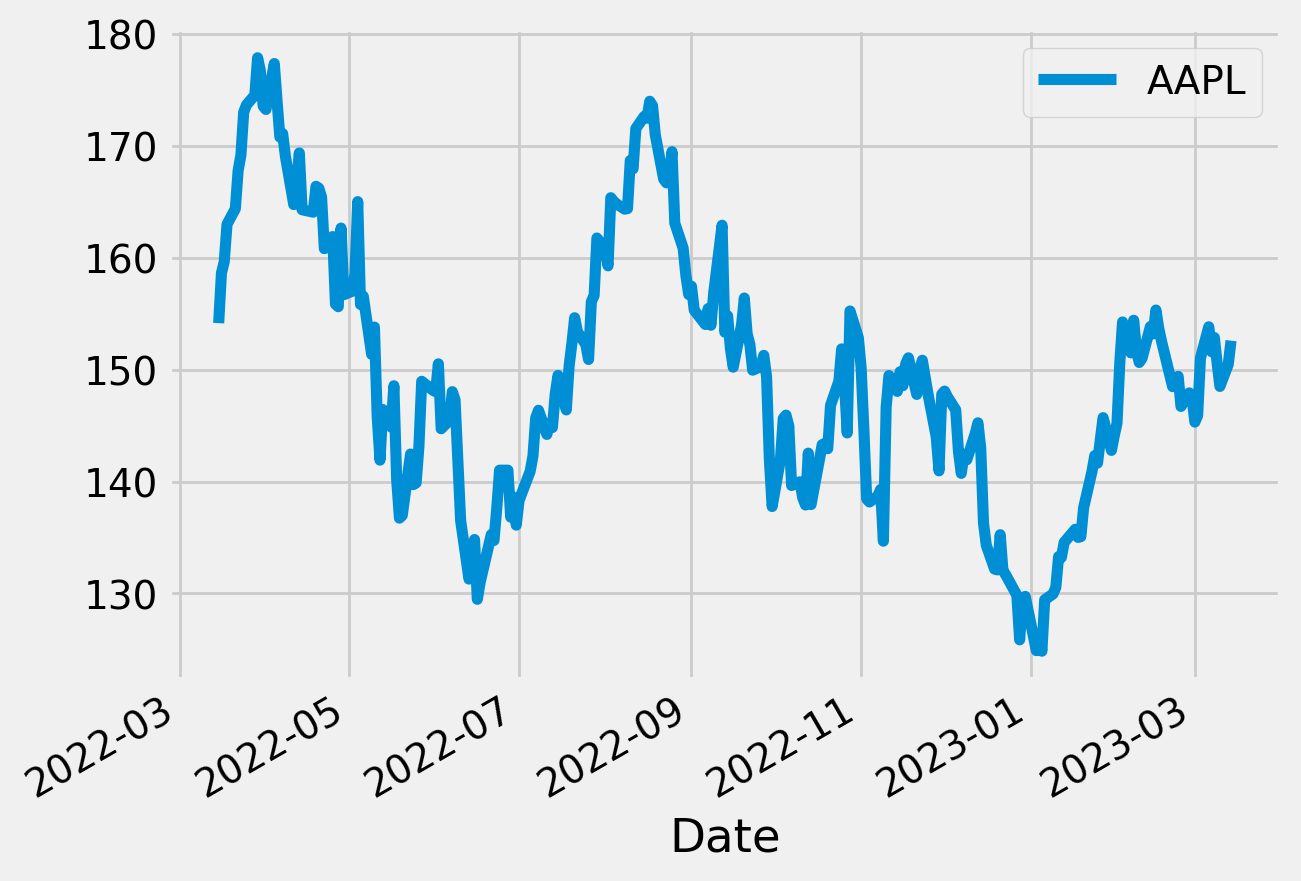

In [23]:
import yfinance as yf


start = datetime.datetime(2017, 12, 31)
end = datetime.datetime(2018, 12, 31)

start = '2022-03-15'
end = '2023-03-15'

df = yf.download('AAPL', start, end)
stock = df.loc[:,['Adj Close']]
stock.columns = ['AAPL']
stock.plot()
stock.head()

In [24]:
def get_stock(tick, start=start, end=end ):
    df =  yf.download(tick, start, end)
    stock = df.loc[:,['Adj Close']]
    stock.columns = [tick]
    stock=stock.sort_index()
    return stock

In [25]:
def get_stocks(ticks, start=start, end=end):

    stock= get_stock(ticks[0], start, end)
    for i in ticks[1:]:
        stock = stock.join(get_stock(i, start, end ))
    return stock

In [26]:
ticks = ['GME','BB','AMC','BBBY','NOK','EXPR','KOSS','SIVB','CS']
stocks = get_stocks(ticks)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [27]:
print(stocks.head())
stocks.tail()

                  GME    BB    AMC       BBBY       NOK  EXPR  KOSS  \
Date                                                                  
2022-03-15  20.660000  6.09  14.48  20.379999  5.031339  3.36  6.37   
2022-03-16  21.715000  6.57  15.23  21.320000  5.189185  3.29  6.49   
2022-03-17  21.924999  6.82  15.19  21.870001  5.248377  3.44  6.85   
2022-03-18  22.697500  7.03  15.80  22.070000  5.258243  3.53  7.47   
2022-03-21  23.549999  7.13  15.86  23.000000  5.228646  3.39  7.43   

                  SIVB        CS  
Date                              
2022-03-15  526.659973  7.469560  
2022-03-16  556.799988  7.853372  
2022-03-17  564.729980  7.882895  
2022-03-18  570.440002  8.020674  
2022-03-21  565.510010  8.010833  


,GME,BB,AMC,BBBY,NOK,EXPR,KOSS,SIVB,CS
Date,,,,,,,,,
2023-03-08,18.17,3.62,5.84,1.30,4.76,0.91,4.97,267.829987,2.90
2023-03-09,17.52,3.66,5.65,1.23,4.74,0.89,4.87,106.040001,2.77
2023-03-10,17.25,3.59,5.38,1.34,4.69,0.88,4.80,106.040001,2.66
2023-03-13,16.75,3.58,5.46,1.24,4.66,0.88,4.73,106.040001,2.54
2023-03-14,16.91,3.72,4.64,1.15,4.68,0.89,4.71,106.040001,2.51


Text(0, 0.5, 'price in $')

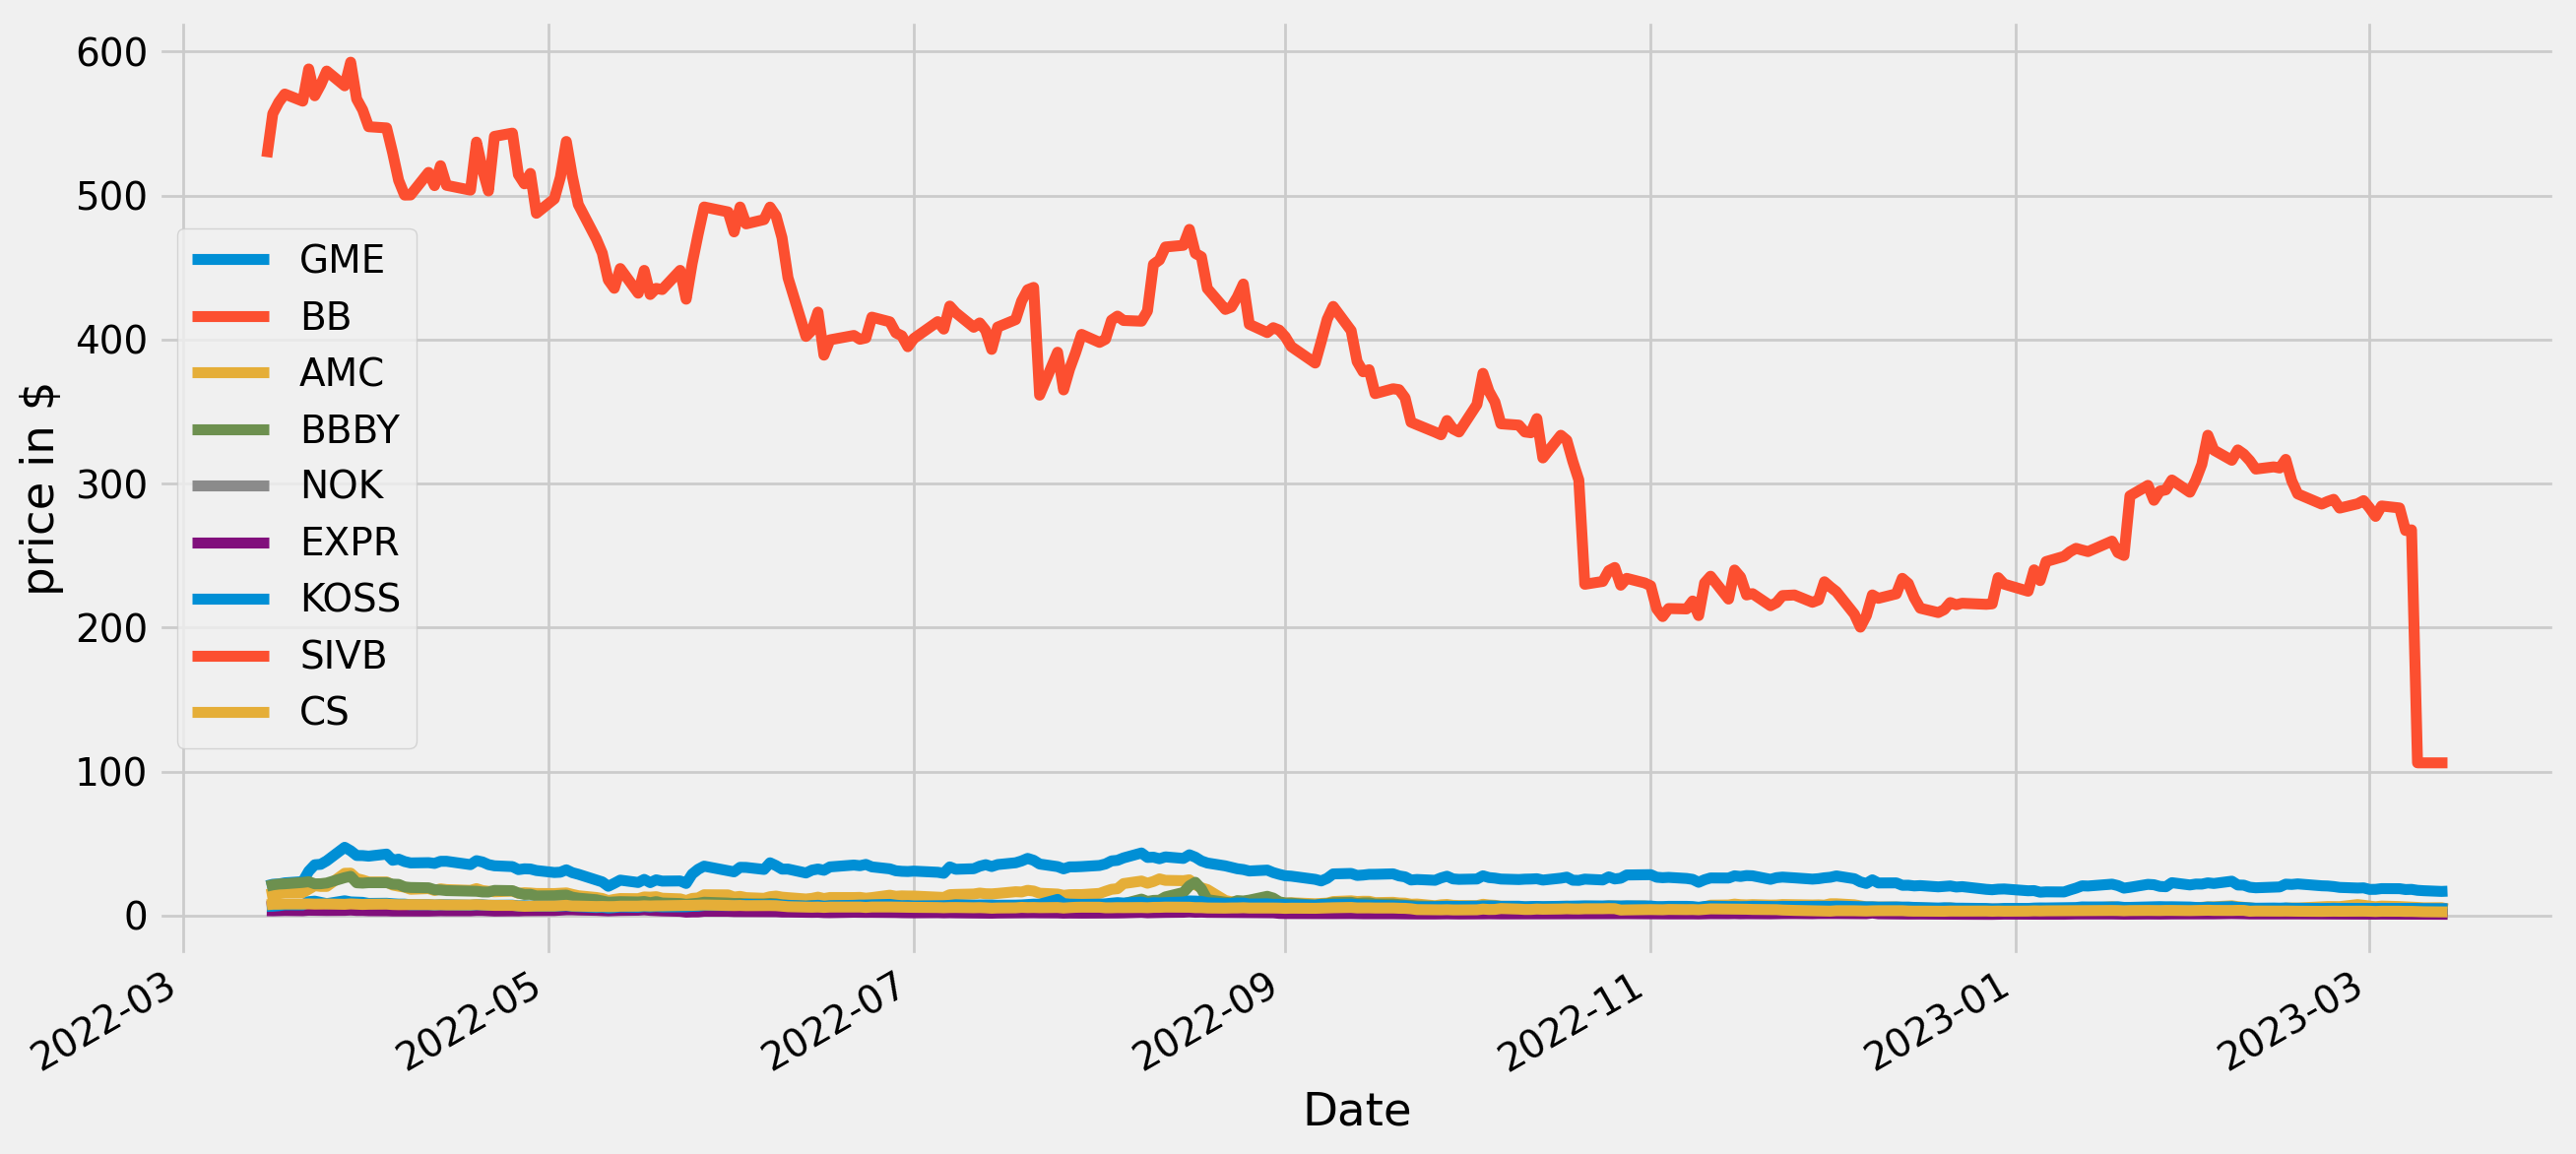

In [28]:
stocks.plot(figsize=(14, 7))
plt.ylabel('price in $')

                 GME        BB       AMC      BBBY       NOK      EXPR  \
Date                                                                     
2022-03-15       NaN       NaN       NaN       NaN       NaN       NaN   
2022-03-16  0.051065  0.078818  0.051796  0.046124  0.031373 -0.020833   
2022-03-17  0.009671  0.038052 -0.002626  0.025797  0.011407  0.045593   
2022-03-18  0.035234  0.030792  0.040158  0.009145  0.001880  0.026163   
2022-03-21  0.037559  0.014225  0.003797  0.042139 -0.005629 -0.039660   

                KOSS      SIVB        CS  
Date                                      
2022-03-15       NaN       NaN       NaN  
2022-03-16  0.018838  0.057229  0.051383  
2022-03-17  0.055470  0.014242  0.003759  
2022-03-18  0.090511  0.010111  0.017478  
2022-03-21 -0.005355 -0.008642 -0.001227  


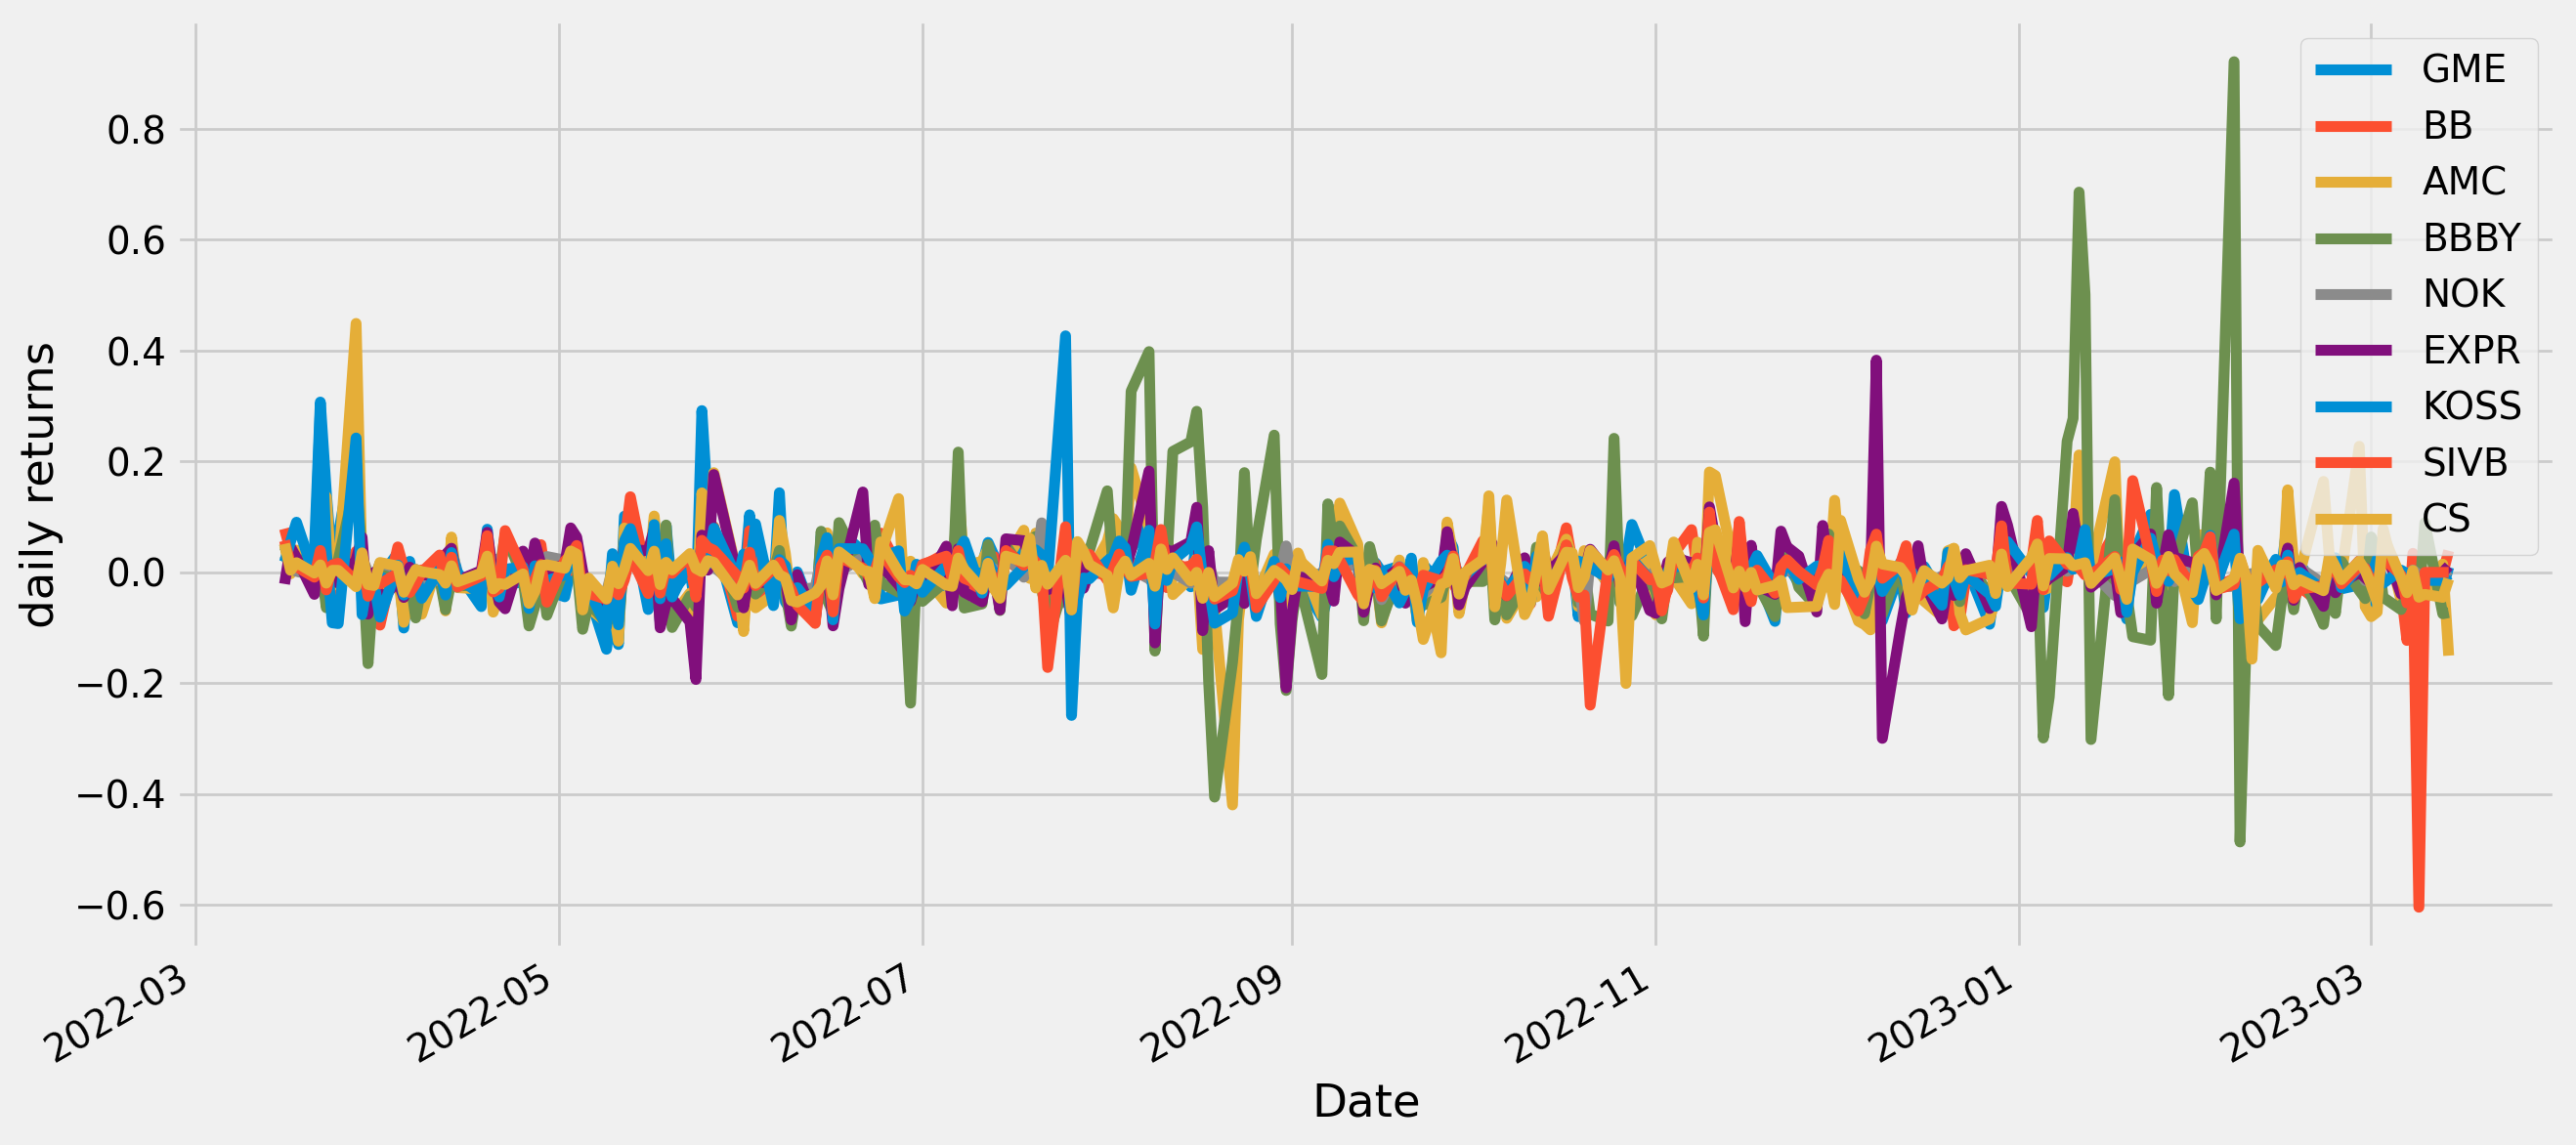

In [29]:
returns = stocks.pct_change() # stock returns 
print(returns.head())

returns.plot(figsize=(14, 7))
plt.ylabel('daily returns');

In [30]:
returns.head(5)

,GME,BB,AMC,BBBY,NOK,EXPR,KOSS,SIVB,CS
Date,,,,,,,,,
2022-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-16,0.051065,0.078818,0.051796,0.046124,0.031373,-0.020833,0.018838,0.057229,0.051383
2022-03-17,0.009671,0.038052,-0.002626,0.025797,0.011407,0.045593,0.055470,0.014242,0.003759
2022-03-18,0.035234,0.030792,0.040158,0.009145,0.001880,0.026163,0.090511,0.010111,0.017478
2022-03-21,0.037559,0.014225,0.003797,0.042139,-0.005629,-0.039660,-0.005355,-0.008642,-0.001227


In [31]:
mean_returns = returns.mean()

cov_matrix = returns.cov()

print(cov_matrix.head())
mean_returns;

           GME        BB       AMC      BBBY       NOK      EXPR      KOSS  \
GME   0.003719  0.001228  0.003109  0.003288  0.000416  0.001988  0.001747   
BB    0.001228  0.001314  0.001434  0.001399  0.000373  0.000960  0.000886   
AMC   0.003109  0.001434  0.006134  0.004269  0.000484  0.001972  0.001964   
BBBY  0.003288  0.001399  0.004269  0.016351  0.000302  0.003114  0.002328   
NOK   0.000416  0.000373  0.000484  0.000302  0.000424  0.000404  0.000331   

          SIVB        CS  
GME   0.001056  0.000718  
BB    0.000742  0.000582  
AMC   0.001186  0.000857  
BBBY  0.001121  0.000727  
NOK   0.000388  0.000397  


### 2.2  Modern Portfolio Theory (MPT)  and Sharpe ratio

#### 2.2.1 MPT

Modern Portfolio Theory (MPT) is an investment theory developed by Harry Markowitz and published under the title “Portfolio Selection” in the Journal of Finance in 1952.

![](https://cdn-images-1.medium.com/max/2000/1*z3qQHXi4CyTtb_oSKInvYA.png)

The Formula can be expressed in matrix calculation

![](https://cdn-images-1.medium.com/max/1600/1*Fe8_FBagP5p3RHBhzW2Ijg.gif)

#### 2.2.2 Sharpe ratio
The Sharpe ratio was derived in 1966 by William Sharpe, another winner of a Nobel Memorial Prize in Economic Sciences.
![](https://cdn-images-1.medium.com/max/1600/1*aXiygSH2vLBUwAFTZKW47g.jpeg)

Risk-adjusted return refines an investment’s return by measuring how much risk is involved in producing that return, which is generally expressed as a number or rating. 
![](https://cdn-images-1.medium.com/max/1500/1*fo_KcYDFTQ-C9iriE67r2w.png)

##### Risk free rate:
1-Year Treasury Bill: Secondary Market Rate (DTB1YR)
ref: https://fred.stlouisfed.org/series/DTB1YR

In [32]:
Rf = web.DataReader(['DTB1YR'], 'fred', start, end).dropna()

In [33]:
Rf.tail()

,DTB1YR
DATE,
2023-03-09,4.93
2023-03-10,4.68
2023-03-13,4.13
2023-03-14,4.27
2023-03-15,4.04


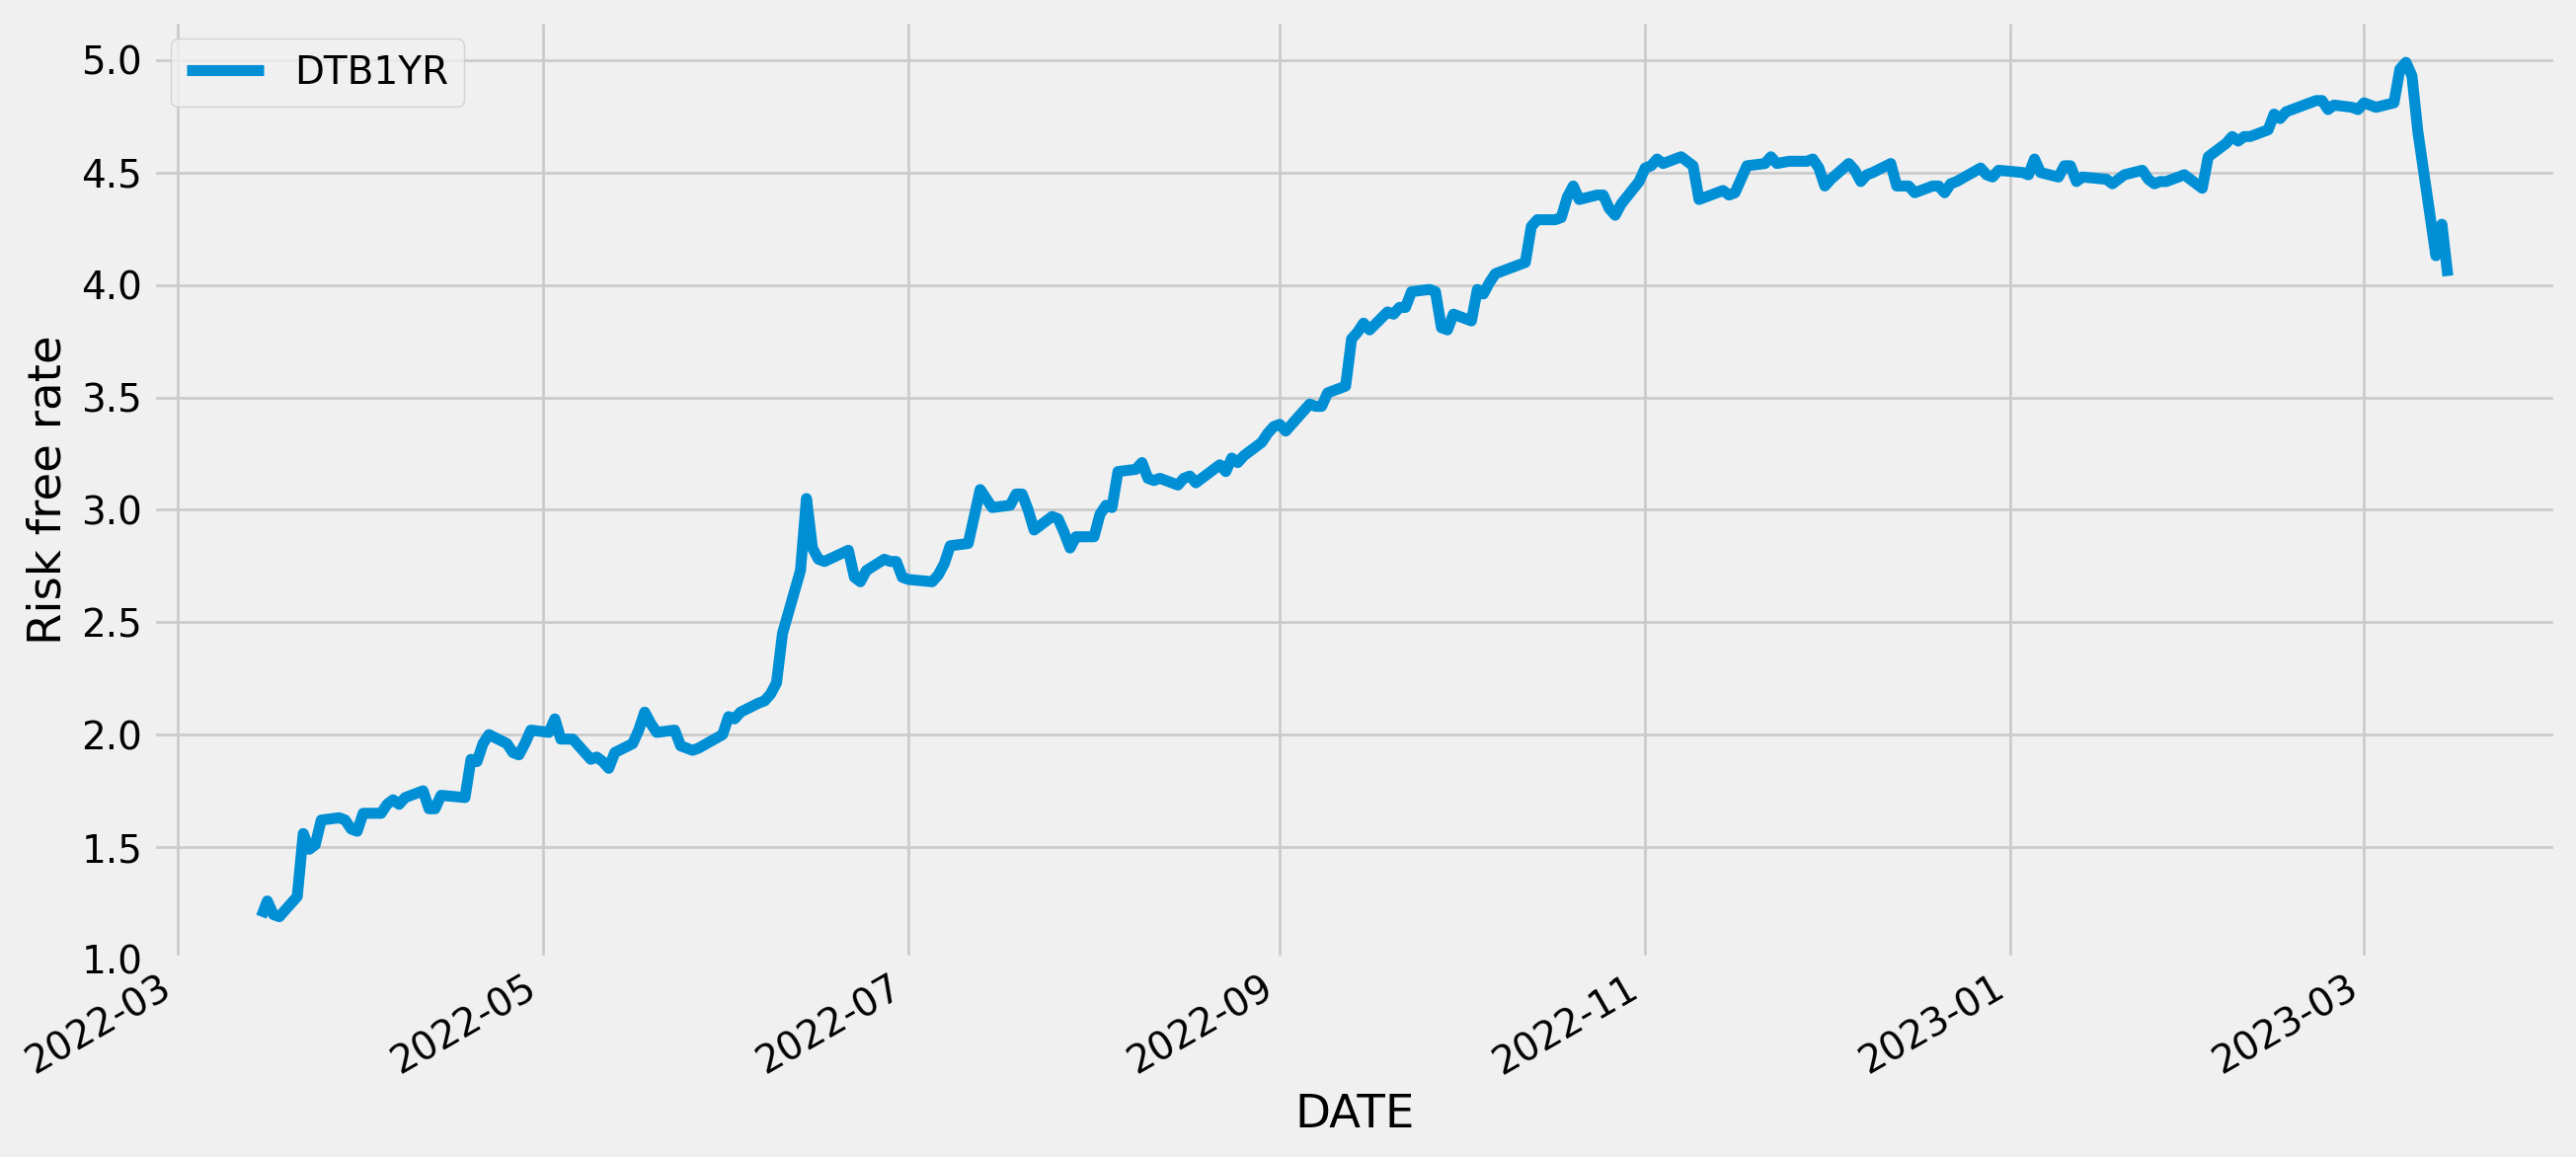

In [34]:
Rf.plot(figsize=(14, 7))
plt.ylabel('Risk free rate');

### 2.3 Putting all together

In [45]:
def portfolio_annualised_performance(weights, 
                                     returns, 
                                     risk_free_rate =0.4):
    """
    Compute the annualized return 
    and standard diveation
    and sharpe ratio
    """
    mean_returns = returns.mean()
    cov_matrix = returns.cov()
    returns = np.sum(mean_returns*weights)*252
    std = np.sqrt(weights.T@cov_matrix@weights) * np.sqrt(252)
    sharpe = (returns - risk_free_rate) / std
    return std, returns, sharpe

##### Maximize Sharpe ratio

In [46]:
def sharpe_ratio(weights, returns, 
                 risk_free_rate):
    
    return portfolio_annualised_performance(weights, 
                                            returns, 
                                            risk_free_rate)[2]

def neg_sharpe_ratio(weights, returns, 
                     risk_free_rate):
    return - sharpe_ratio(weights, returns, 
                          risk_free_rate)
#In Scipy’s optimize function, there’s no ‘maximize’, so as an objective function you need to pass something 
#that should be minimized. That is why the first “neg_sharpe_ratio” is computing the negative Sharpe ratio.

In [47]:
def max_sharpe_ratio(returns,risk_free_rate):
    """
    Solve the max sharpe ratio portifolio"""
    mean_returns = returns.mean()
    cov_matrix = returns.cov()
    num_assets = len(mean_returns)
    args = (returns, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}) #np.sum(x) == 1 has become np.sum(x)-1
    bound = (0.0,1.0)
    # Multiply a tuple with a tuple as its item. Don't forget a trailing ,.
    bounds = (bound,)*num_assets  # tuple(bound for asset in range(num_assets))
    x0=[1./num_assets,]*num_assets # Multiply a list with a number as its item. Don't forget a trailing ,.
    solution = opt.minimize(neg_sharpe_ratio, x0=x0, 
                           args=args,  # other arguments for function neg_sharpe_ratio
                           method='SLSQP', 
                           bounds=bounds, 
                           constraints=constraints)
    return solution

##### Minimize the portfolio's variance
We can also define the optimizing function for calculating minimum volatility portfolio. This time we really do minimize the objective function. We want to minimize volatility by trying different weights. "constraints" and "bounds" are same as the above.

In [48]:
def portfolio_volatility(weights, returns):
    return portfolio_annualised_performance(weights, 
                                            returns)[0]

def min_variance(returns):
    mean_returns = returns.mean()
    cov_matrix = returns.cov()    
    num_assets = len(mean_returns)
    args = (returns)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = (bound,)*num_assets
    x0=[1./num_assets,]*num_assets # Multiply a list with a number as its item. Don't forget a trailing ,.

    solution = opt.minimize(portfolio_volatility, 
                          x0=x0, args=args,
                          method='SLSQP', 
                          bounds=bounds, 
                          constraints=constraints)

    return solution

##### Implement Monte Carlo simulation 

In [49]:
def random_portfolios(num_portfolios,returns, risk_free_rate):
    """
    Monte Carlo ramdon portfolio return, std, and sharpe
    """
    mean_returns = returns.mean()
    cov_matrix = returns.cov()
    results = np.zeros((3,num_portfolios))
    weights_record = np.zeros((len(mean_returns),num_portfolios))
    for i in np.arange(num_portfolios):
        weights = np.random.uniform(low=0.0,high=1.0,size=len(mean_returns)) # generate random portofolio
        weights /= np.sum(weights)
        weights_record[:,i] =weights
        portfolio_std_dev, portfolio_return, sharpe = portfolio_annualised_performance(weights, returns,risk_free_rate)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = sharpe
    return results, weights_record

In [50]:
num_portfolios = 10000

risk_free_rate = Rf.iloc[-1]['DTB1YR']/100

In [51]:
def display_simulated_ef_with_random(returns, 
                                     num_portfolios, 
                                     risk_free_rate):
    
    """
    display efficient frontie with random portfolio
    choose the max sharpe and min volatility portfolio from random samples
    """
    mean_returns = returns.mean()
    cov_matrix = returns.cov()
    results, weights = random_portfolios(num_portfolios,returns,risk_free_rate)
    
    # find the max sharpe
    max_sharpe_idx = np.argmax(results[2])
    max_sharpe = np.max(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    
    # for pretty printing
    max_sharpe_allocation = pd.DataFrame(weights[:,max_sharpe_idx],
                                         index=mean_returns.index,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    # find the min volatility
    min_vol_idx = np.argmin(results[0])
    min_vol = np.min(results[0])
    
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[:,min_vol_idx],index=mean_returns.index,columns=['allocation'])
    
    # for pretty printing
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print( "-"*80)
    print( "Maximum Sharpe Ratio Portfolio Allocation:{:.2f}\n".format(max_sharpe))
    print( "Annualised Return:", round(rp,2))
    print( "Annualised Volatility:", round(sdp,2))
    print( "\n")
    print( max_sharpe_allocation)
    print( "-"*80)
    print( "Minimum Volatility Portfolio Allocation:{:.2f}\n".format(min_vol))
    print( "Annualised Return:", round(rp_min,2))
    print( "Annualised Volatility:", round(sdp_min,2))
    print( "\n")
    print( min_vol_allocation)
    
    #######################################################################
    # anualized volatility and return
    an_vol = np.std(returns) * np.sqrt(252)
    an_rt = mean_returns * 252
      
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)
    # plot each volatility and return for each asset
    for i, txt in enumerate(mean_returns.index):
           ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')

    #######################################################################
    # Monte Carlo samples
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='RdYlBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    
    ####################################################################
    # Maximum Sharp ratio portfolio
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    # Minimum Volatility portfolio
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    
    ########################################################################
    plt.title('Simulated Portfolio Optimization Colord by Sharpe Ratio')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation:-0.16

Annualised Return: -0.05
Annualised Volatility: 0.57


              GME     BB   AMC  BBBY    NOK  EXPR  KOSS  SIVB   CS
allocation  33.02  22.01  0.63  0.82  23.27  4.54  14.5  1.12  0.1
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation:0.45

Annualised Return: -0.5
Annualised Volatility: 0.45


             GME    BB   AMC  BBBY   NOK  EXPR  KOSS   SIVB     CS
allocation  6.47  17.6  1.73  1.37  24.5  9.37  3.07  13.04  22.84


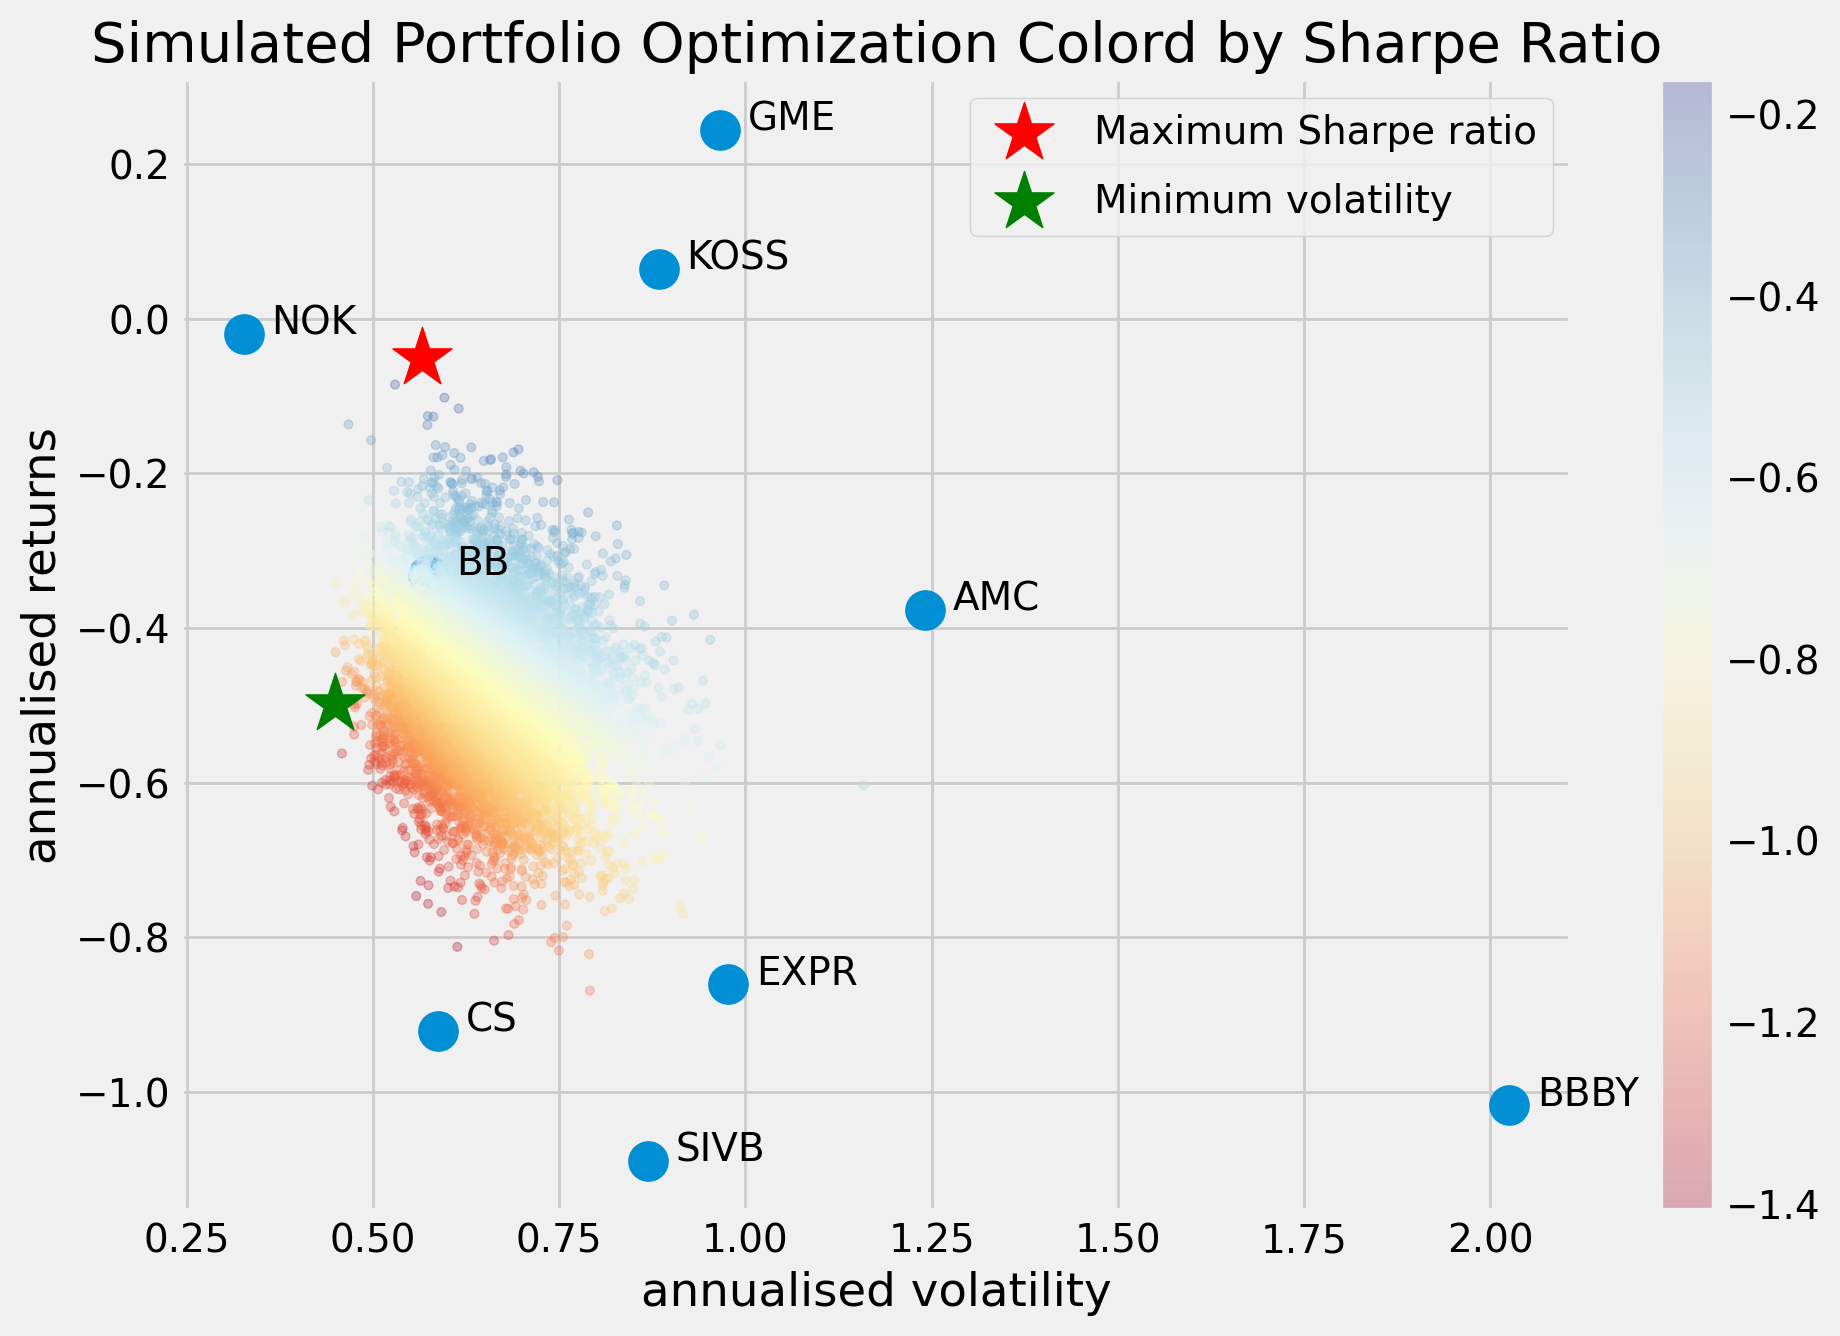

In [52]:
display_simulated_ef_with_random(returns, num_portfolios, risk_free_rate)


##### Derive the efficient frontier

In [53]:
def efficient_return(returns, target):
    mean_returns = returns.mean()
    cov_matrix = returns.cov()
    num_assets = len(mean_returns)
    args = (returns)
    # for constraint of targe return
    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, 
                                                returns)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = ((0,1),)*num_assets
    x0 = num_assets*[1./num_assets,]
    solution = opt.minimize(portfolio_volatility, 
                            x0=x0, 
                            args=args, method='SLSQP', 
                            bounds=bounds, constraints=constraints)
    return solution # include 'fun' objetive funtion value: return, 'x' weights


def efficient_frontier(returns, returns_range):    
    efficientsolutions = [] # list is flexible to store the solutions from Scipy minimization routine
    for ret in returns_range:
        efficientsolutions.append(efficient_return(returns, ret))
    return efficientsolutions

In [54]:
def display_calculated_ef_with_random(returns, 
                                      num_portfolios, 
                                      risk_free_rate):
    """
    display efficient frontie with random portfolio
    choose max sharpe and min volatitlity portfolio 
    by optimization using scipy.optimization.minimization
    """
        
    mean_returns = returns.mean()
    cov_matrix = returns.cov()
    # only need the std and return from random experiments

    results, _ = random_portfolios(num_portfolios,
                                   returns,  
                                   risk_free_rate)
    
    # find the max sharpe by optimization
    max_sharpe_solution = max_sharpe_ratio(returns,  
                                           risk_free_rate)
    
    sdp, rp,max_sharpe = portfolio_annualised_performance(
        max_sharpe_solution['x'], 
        returns,
        risk_free_rate)
    # for pretty printing
    max_sharpe_allocation = pd.DataFrame(max_sharpe_solution['x'],
                                         index=mean_returns.index,
                                         columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    # find min volatility by optimization
    min_vol_solution = min_variance(returns)
    sdp_min, rp_min, vol_sharpe = portfolio_annualised_performance(
        min_vol_solution['x'], 
        returns, 
        risk_free_rate)
    min_vol_allocation = pd.DataFrame(min_vol_solution['x'],
                                      index=mean_returns.index,
                                      columns=['allocation'])
    # for pretty printing
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print( "-"*80)
    print( "Maximum Sharpe Ratio Portfolio Allocation:{:.2f}\n".format(max_sharpe))
    print( "Annualised Return:", round(rp,2))
    print( "Annualised Volatility:", round(sdp,2))
    print( "\n")
    print( max_sharpe_allocation)
    print( "-"*80)
    print( "Minimum Volatility Portfolio Allocation with Sharpe:{:.2f}\n".format(vol_sharpe))
    print( "Annualised Return:", round(rp_min,2))
    print( "Annualised Volatility:", round(sdp_min,2))
    print( "\n")
    print( min_vol_allocation)
    
    # anualized volatility and return for each asset
    an_vol = np.std(returns) * np.sqrt(252)
    an_rt = mean_returns * 252
    
    fig, ax = plt.subplots(figsize=(10, 7))
    
    # plot each volatility and return for each asset
    ax.scatter(an_vol,an_rt,marker='o',s=200)
    
    for i, txt in enumerate(mean_returns.index):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    
    
    # Monte Carlo samples with color map 'YlGnBu' and color is the value of sharpe ratio
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='RdYlBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    # Maximum Sharp ratio portfolio
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    # Minimum Volatility portfolio
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    
    
    ###############################################################
    # compute and plot efficient frontie
    r_max=max(an_rt)
    target = np.linspace(rp_min, r_max, 100)
    efficient_portfolios = efficient_frontier(returns, target)
    # a list of solutions of efficient portifolio
    # p['fun] is the objective function value: return
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', 
             color='black', label='efficient frontier')
    
    
    ################################################################
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier Colord by Sharpe Ratio')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)
    
    

In [ ]:
display_calculated_ef_with_random(returns,                                  
                                  num_portfolios, 
                                  risk_free_rate);